In [170]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 1
l=4
h=1
m=1

In [171]:
alpha = 1
l=4
h=1
m=1

def E(n):
    return ((h**2)/2*m) *(alpha**2) *((l*(l-1)/2) - (l-1-n)**2)

y=[]
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in x:
    ans=E(i)
    y.append(ans)

print (y)


[-1.5, 1.0, 2.5, 3.0, 2.5, 1.0, -1.5, -5.0, -9.5, -15.0, -21.5]


The turning point is -1.914084553718567 after 23 iterations
The turning point is 1.914084553718567 after 23 iterations


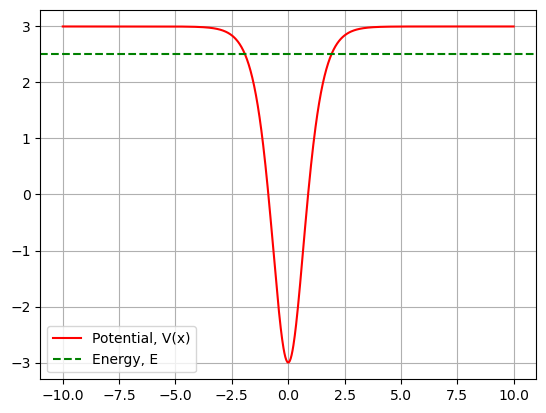

In [172]:
def V(x,E):
    return E - (h ** 2 / (2 * m) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2) )

def bisection_method(E_guess, x_0, x_1,max_iter = 1000,tol=1*10**-6):
    for i in range (max_iter):
        c=(x_0 + x_1) / 2
        if V(c, E_guess) == 0 or (x_1-x_0) /2 < tol :
            print ('The turning point is', c, 'after', i,'iterations')
            break
        if V(x_0, E_guess) * V(c, E_guess) < 0:
            x_1 = c
        else:
            x_0 = c
        
#Left turning points
xleft=bisection_method(2.5, -10, 0,max_iter = 1000,tol=1*10**-6)

#Right turning points
xright=bisection_method(2.5, 0, 10,max_iter = 1000,tol=1*10**-6)

def V(x):
    return h ** 2 / (2 * m) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)

y=[]
x = np.linspace(-10,10,1000)
for i in x:
    ans=V(i)
    y.append(ans)

plt.plot(x,y,color='red',label='Potential, V(x)')
plt.axhline(y=E_guess, color ="green", linestyle ="--",label='Energy, E')
plt.grid()
plt.legend()
plt.show()

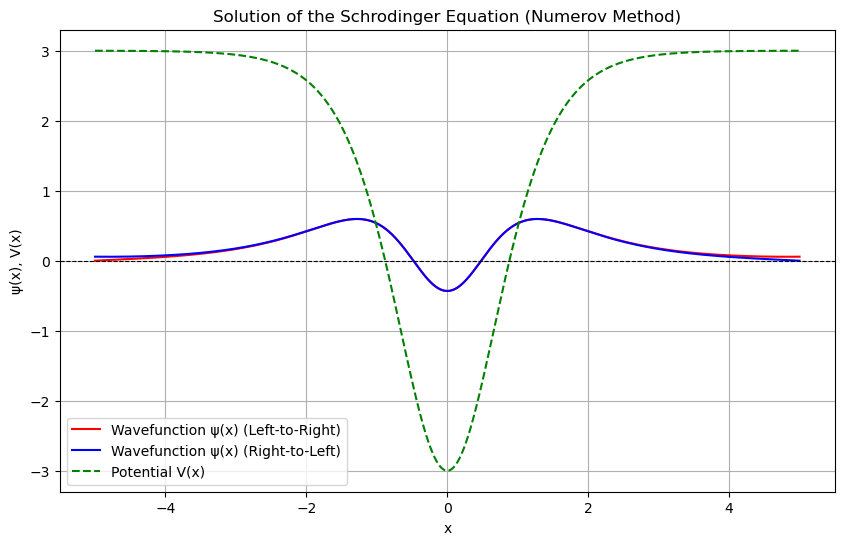

In [173]:
def numerov(E, V, x, h, direction="lr"):
    # Calculate k^2 at each point
    k2 = 2 * (E - V(x))

    # Initialize psi array
    psi = np.zeros_like(x)

    if direction == "lr":
        # Boundary conditions for left-to-right
        psi[0] = 0.0
        psi[1] = 1e-5  # Small non-zero value to start iteration

        # Iterate using the Numerov formula
        for i in range(1, len(x) - 1):
            psi[i + 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i - 1] / 12) * psi[i - 1])
                / (1 + h**2 * k2[i + 1] / 12)
            )

    elif direction == "rl":
        # Boundary conditions for right-to-left
        psi[-1] = 0.0
        psi[-2] = 1e-10  # Small non-zero value to start iteration

        # Iterate using the Numerov formula (right-to-left)
        for i in range(len(x) - 2, 0, -1):
            psi[i - 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i + 1] / 12) * psi[i + 1])
                / (1 + h**2 * k2[i - 1] / 12)
            )

    return psi

# Define the parameters
x_min, x_max = -5, 5  # Range of x
N = 10000  # Number of points
h = (x_max - x_min) / N  # Step size
x = np.linspace(x_min, x_max, N)

# Define potential function (e.g., Poschl-Teller potential)
def V(x, m=1, hbar=1, l=4, alpha=1):
    return (hbar ** 2 / (2 * m)) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)


E = 2.5  # Trial energy level

# Solve the Schrodinger equation left-to-right
psi_lr = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="lr")

# Solve the Schrodinger equation right-to-left
psi_rl = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="rl")

# Normalize the wavefunctions
psi_lr_norm = psi_lr / np.sqrt(np.sum(psi_lr**2) * h)
psi_rl_norm = psi_rl / np.sqrt(np.sum(psi_rl**2) * h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, psi_lr_norm, color='red', label="Wavefunction \u03C8(x) (Left-to-Right)")
plt.plot(x, psi_rl_norm, color='blue', label="Wavefunction \u03C8(x) (Right-to-Left)")
plt.plot(x, V(x, m, hbar, l, alpha), label="Potential V(x)", linestyle="--", color="green")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Solution of the Schrodinger Equation (Numerov Method)")
plt.xlabel("x")
plt.ylabel("\u03C8(x), V(x)")
plt.legend()
plt.grid()
plt.show()


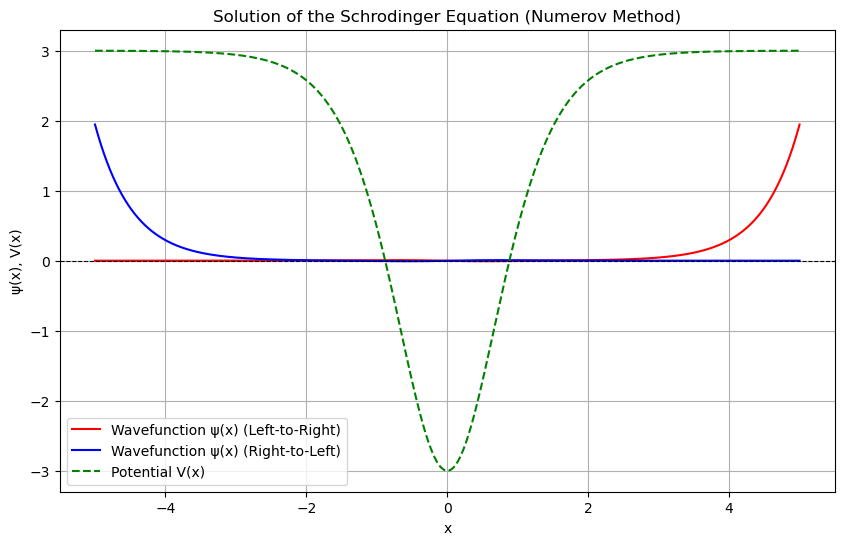

In [174]:
def numerov(E, V, x, h, direction="lr"):
    # Calculate k^2 at each point
    k2 = 2 * (E - V(x))

    # Initialize psi array
    psi = np.zeros_like(x)

    if direction == "lr":
        # Boundary conditions for left-to-right
        psi[0] = 0.0
        psi[1] = 1e-5  # Small non-zero value to start iteration

        # Iterate using the Numerov formula
        for i in range(1, len(x) - 1):
            psi[i + 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i - 1] / 12) * psi[i - 1])
                / (1 + h**2 * k2[i + 1] / 12)
            )

    elif direction == "rl":
        # Boundary conditions for right-to-left
        psi[-1] = 0.0
        psi[-2] = 1e-10  # Small non-zero value to start iteration

        # Iterate using the Numerov formula (right-to-left)
        for i in range(len(x) - 2, 0, -1):
            psi[i - 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i + 1] / 12) * psi[i + 1])
                / (1 + h**2 * k2[i - 1] / 12)
            )

    return psi

# Define the parameters
x_min, x_max = -5, 5  # Range of x
N = 10000  # Number of points
h = (x_max - x_min) / N  # Step size
x = np.linspace(x_min, x_max, N)

# Define potential function (e.g., Poschl-Teller potential)
def V(x, m=1, hbar=1, l=4, alpha=1):
    return (hbar ** 2 / (2 * m)) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)

E = 1.2  # Trial energy level

# Solve the Schrodinger equation left-to-right
psi_lr = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="lr")

# Solve the Schrodinger equation right-to-left
psi_rl = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="rl")

# Normalize the wavefunctions
psi_lr_norm = psi_lr / np.sqrt(np.sum(psi_lr**2) * h)
psi_rl_norm = psi_rl / np.sqrt(np.sum(psi_rl**2) * h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, psi_lr_norm, color='red', label="Wavefunction \u03C8(x) (Left-to-Right)")
plt.plot(x, psi_rl_norm, color='blue', label="Wavefunction \u03C8(x) (Right-to-Left)")
plt.plot(x, V(x, m, hbar, l, alpha), label="Potential V(x)", linestyle="--", color="green")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Solution of the Schrodinger Equation (Numerov Method)")
plt.xlabel("x")
plt.ylabel("\u03C8(x), V(x)")
plt.legend()
plt.grid()
plt.show()


Eigenvalues found: [1.0028588617830028, 1.045444223184584, 2.5024280119823645, 2.710111188879025]


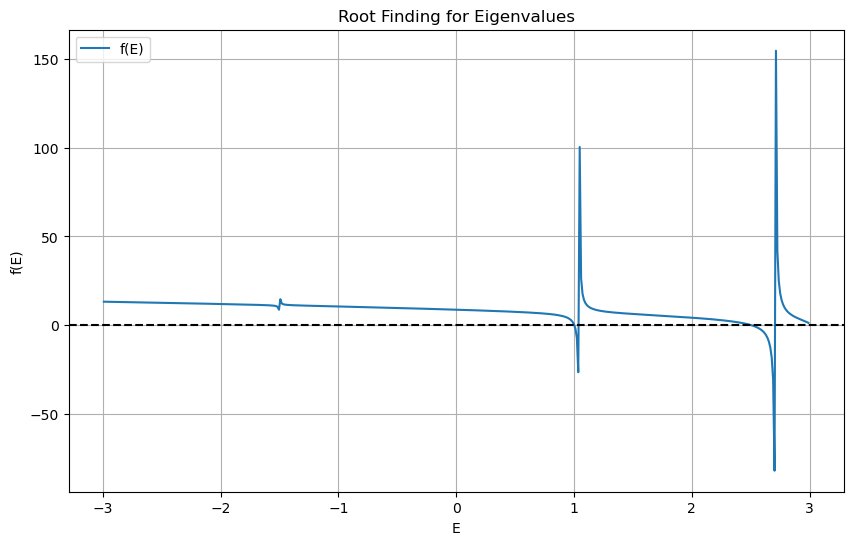

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def numerov(E, V, x, h, direction="lr"):
    k2 = 2 * (E - V(x))
    psi = np.zeros_like(x)

    if direction == "lr":
        psi[0] = 0.0
        psi[1] = 1e-5
        for i in range(1, len(x) - 1):
            psi[i + 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i - 1] / 12) * psi[i - 1])
                / (1 + h**2 * k2[i + 1] / 12)
            )
    elif direction == "rl":
        psi[-1] = 0.0
        psi[-2] = 1e-5
        for i in range(len(x) - 2, 0, -1):
            psi[i - 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i + 1] / 12) * psi[i + 1])
                / (1 + h**2 * k2[i - 1] / 12)
            )
    return psi

# Define the potential function
def V(x, m=1, hbar=1, l=4, alpha=1):
    return (hbar ** 2 / (2 * m)) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)

# Define f(E)
def f(E, x, h, V, turning_points, m=1, hbar=1, l=4, alpha=1):
    # Solve left-to-right and right-to-left wavefunctions
    psi_lr = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="lr")
    psi_rl = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="rl")

    # Compute the gradient continuity condition at both turning points
    differences = []
    for x_t in turning_points:
        idx_t = np.argmin(np.abs(x - x_t))  # Find index of turning point
        grad_lr = (psi_lr[idx_t + 1] - psi_lr[idx_t - 1]) / (2 * h * psi_lr[idx_t])
        grad_rl = (psi_rl[idx_t + 1] - psi_rl[idx_t - 1]) / (2 * h * psi_rl[idx_t])
        differences.append(grad_lr - grad_rl)

    # Return the sum of absolute differences (close to zero for eigenvalues)
    return sum(differences)

# Parameters
x_min, x_max = -10, 10
N = 1000
h = (x_max - x_min) / N
x = np.linspace(x_min, x_max, N)
m, hbar, l, alpha = 1, 1, 4, 1

# Turning points
turning_points = [-1.914084553718567, 1.914084553718567]

# Scanning range for E
E_min, E_max = -2.99, 2.99
E_values = np.linspace(E_min, E_max, 500)

# Evaluate f(E) and find eigenvalues
roots = []
for i in range(len(E_values) - 1):
    E1, E2 = E_values[i], E_values[i + 1]
    f1 = f(E1, x, h, V, turning_points, m, hbar, l, alpha)
    f2 = f(E2, x, h, V, turning_points, m, hbar, l, alpha)
    
    if f1 * f2 < 0:  # Check for a sign change
        root = brentq(f, E1, E2, args=(x, h, V, turning_points, m, hbar, l, alpha))
        roots.append(root)

# Output eigenvalues
print("Eigenvalues found:", roots)

# Plot the function f(E)
f_values = [f(E, x, h, V, turning_points, m, hbar, l, alpha) for E in E_values]
plt.figure(figsize=(10, 6))
plt.plot(E_values, f_values, label="f(E)")
plt.axhline(0, color="black", linestyle="--")
plt.title("Root Finding for Eigenvalues")
plt.xlabel("E")
plt.ylabel("f(E)")
plt.legend()
plt.grid()
plt.show()
